# Import Data and Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn the project folder path into a string

path = r'/Users/peterreadman/Desktop/Python Projects/CF Achievement 4/'

In [3]:
# import orders_products_merged_busiest.pkl dataframe from the pkl file

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', '02b Prepared Data', 'orders_products_spend_freq_flags.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 25)

# Creating Bar Charts

In [5]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spending_flag', 'median_days',
       'frequency_flag'],
      dtype='object')

<AxesSubplot:>

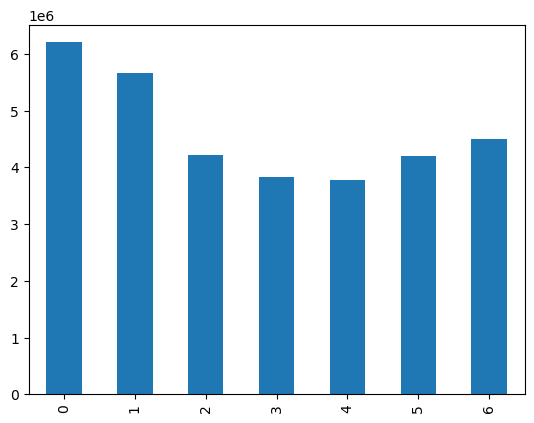

In [6]:
m

ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

# Exporting Charts

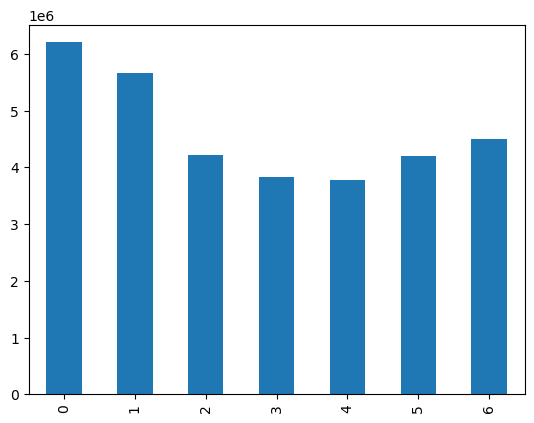

In [7]:
# Export chart (saving it in Jupyter's memory) assign to variable

bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

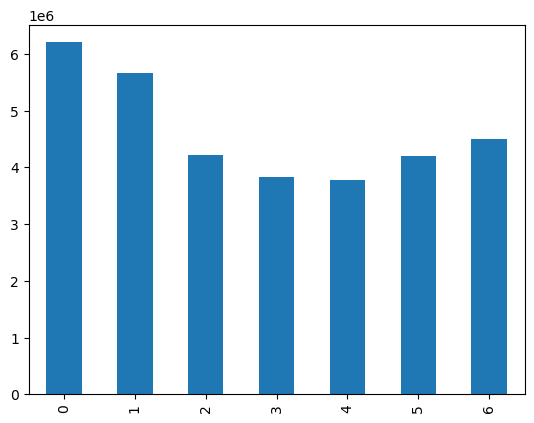

In [8]:
# Call the 'bar' chart any time by bar.figure

bar.figure

In [9]:
# Save as png for external use

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

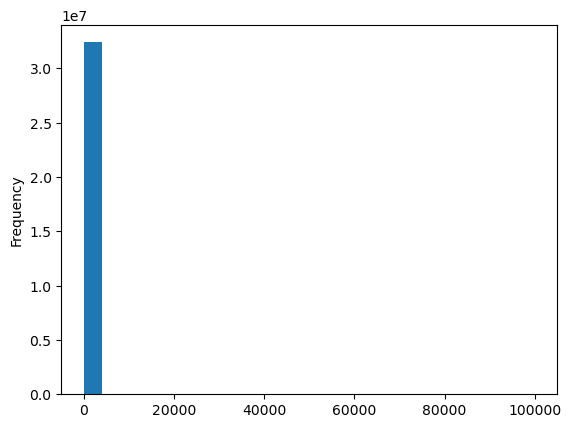

In [10]:
# Let’s try creating a histogram of the “prices” column.
# You can do so via the following code:

ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

There's something odd with the maximum value

In [12]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

Max is huge at $99,999. Use a scatterplot to see it

<AxesSubplot:xlabel='prices', ylabel='prices'>

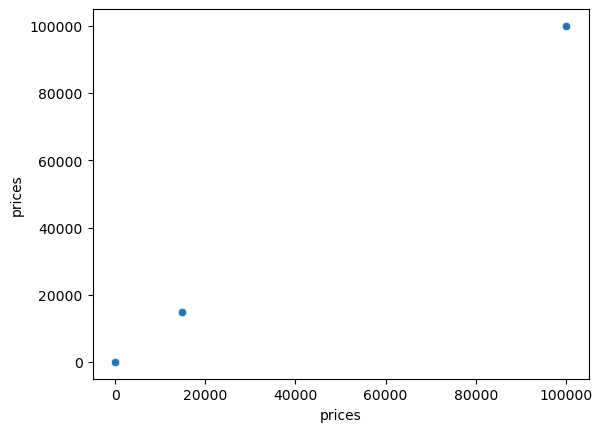

In [15]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

What does this show?
- there's a bunch of values around the mean (12) expected
- theres something near 20,000
- and that max far out near 100,000

In [16]:
# Carry out some more exploratory checks
# Locate prices higher than $100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,21554,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,21554,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,21554,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,21554,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,21554,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,33666,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,33666,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,33666,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,33666,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [17]:
# Show all columns by using set_option() method and setting 'None'

pd.set_option('display.max_columns', None)

In [18]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [19]:
# Mark these as NaNs for now, since they don't make sense in terms of other values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [20]:
ords_prods_merge['prices'].max()

25.0

After you’ve finished up with your ad-hoc data cleaning, let’s retry that histogram of your “prices” column:


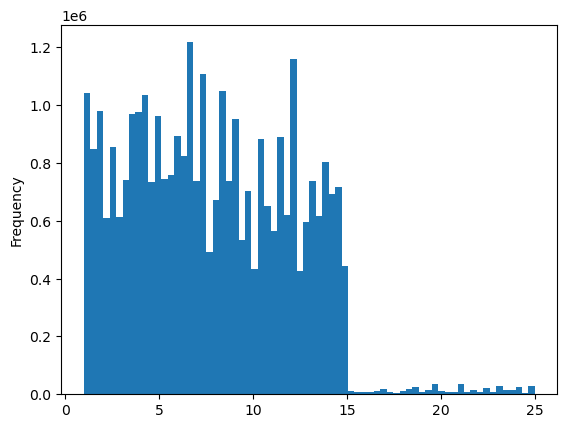

In [21]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
# Export as hist png

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# Creating Line Charts

# Sampling Data
In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized. You can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can you be sure it accurately represents the dataframe as a whole.</br>
</br>
The first step, then, is to create some random samples. A **sample**, as you learned back in Achievement 1, is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. You can then create charts from these samples the same as you would any other subset, the only difference being that you know these subsets accurately represent the entire dataframe as a whole.</br>
</br>
Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. This all sounds a little abstract. Let’s see how it works in practice:

In [23]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <=0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# here's what np.random.rand does in an easier example

np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced.</br>
</br>
In the example we are doing in this exercise, we passed the length of the dataframe len(ords_prods_merge) into the .rand() function, so passed 32,434,212 into the function

So, to recap each piece of the split code, you need to:</br>
</br>
- Set the seed for the random number generator.
- Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
- Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
- Store the results of the test in a new list, dev, in the form of boolean values (True and False).

You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples? This will involve an elegant hack:

In [26]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [27]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [28]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [29]:
# check this worked by adding counts of rows of each sample to check they make 100

len(ords_prods_merge)

32404859

In [30]:
len(big) + len(small)

32404859

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” You can achieve this by running (and checking the result!) of the following command:

In [31]:
df_2 = small[['orders_day_of_the_week','prices']]

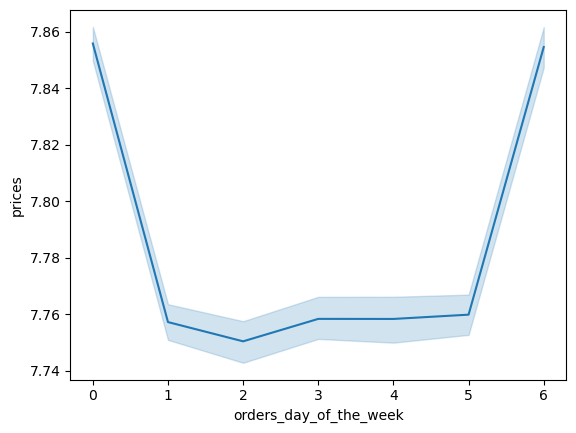

In [32]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

In [33]:
# Compare to entire dataframe

# df_3 = ords_prods_merge[['orders_day_of_the_week','prices']]

#but don't do this as it will take 45 mins to run!!